<a href="https://colab.research.google.com/github/saishshinde15/TensorFlow/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import tensorflow as tf

In [9]:
tf.__version__

'2.15.0'

In [10]:
dataset=pd.read_csv('Heart Attack.csv')

In [11]:
dataset

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


<ipython-input-15-6a52b7e807f1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dataset, x='age', y='class', inner='box', palette='Dark2')


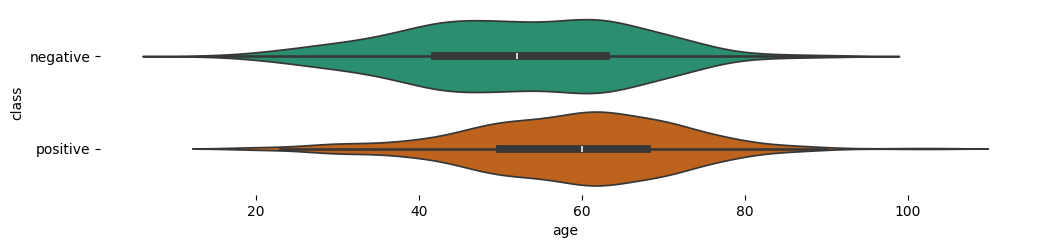

In [15]:
# @title class vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='age', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

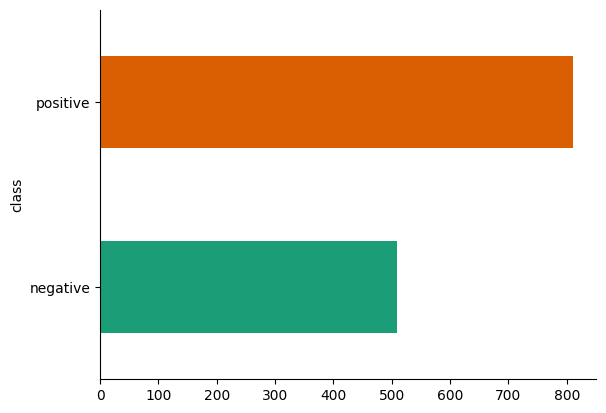

In [13]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [17]:
dataset.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

<ipython-input-18-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

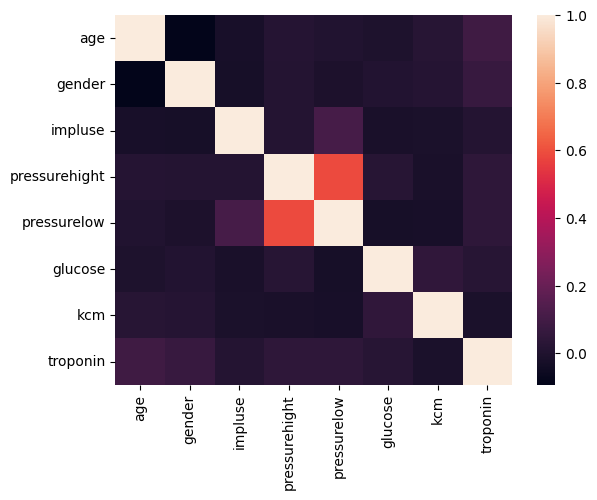

In [18]:
sns.heatmap(dataset.corr())

In [19]:
dataset

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [26]:
X=dataset.iloc[:,0:8].values

In [27]:
X

array([[6.400e+01, 1.000e+00, 6.600e+01, ..., 1.600e+02, 1.800e+00,
        1.200e-02],
       [2.100e+01, 1.000e+00, 9.400e+01, ..., 2.960e+02, 6.750e+00,
        1.060e+00],
       [5.500e+01, 1.000e+00, 6.400e+01, ..., 2.700e+02, 1.990e+00,
        3.000e-03],
       ...,
       [4.500e+01, 1.000e+00, 8.500e+01, ..., 9.600e+01, 1.240e+00,
        4.250e+00],
       [5.400e+01, 1.000e+00, 5.800e+01, ..., 4.430e+02, 5.800e+00,
        3.590e-01],
       [5.100e+01, 1.000e+00, 9.400e+01, ..., 1.340e+02, 5.089e+01,
        1.770e+00]])

In [28]:
y=dataset.iloc[:,-1].values

In [29]:
y

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
ann=tf.keras.models.Sequential()

In [35]:
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [36]:
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [37]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [38]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history=ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
33/33 [==============================] - 3s 30ms/step - loss: 0.6578 - accuracy: 0.6104
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6152
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6294
Epoch 4/100
33/33 [==============================] - 1s 30ms/step - loss: 0.6268 - accuracy: 0.6370
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6474
Epoch 6/100
33/33 [==============================] - 1s 30ms/step - loss: 0.6116 - accuracy: 0.6597
Epoch 7/100
33/33 [==============================] - 0s 14ms/step - loss: 0.6051 - accuracy: 0.6673
Epoch 8/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.6701
Epoch 9/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.6682
Epoch 10/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.6730
Epoch

In [40]:
model1_eval=ann.evaluate(X_test,y_test)

9/9 [==============================] - 1s 63ms/step - loss: 0.3579 - accuracy: 0.8030


In [105]:
model1_train=ann.evaluate(X_train,y_train) #comparing with X_test to check for overfiiting

33/33 [==============================] - 1s 28ms/step - loss: 0.1636 - accuracy: 0.9422


<Axes: >

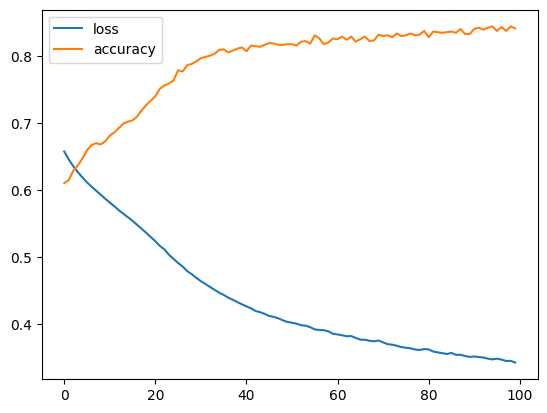

In [41]:
pd.DataFrame(history.history).plot()


In [42]:
y_pred=ann.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [43]:
y_pred=y_pred > 0.5

In [44]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

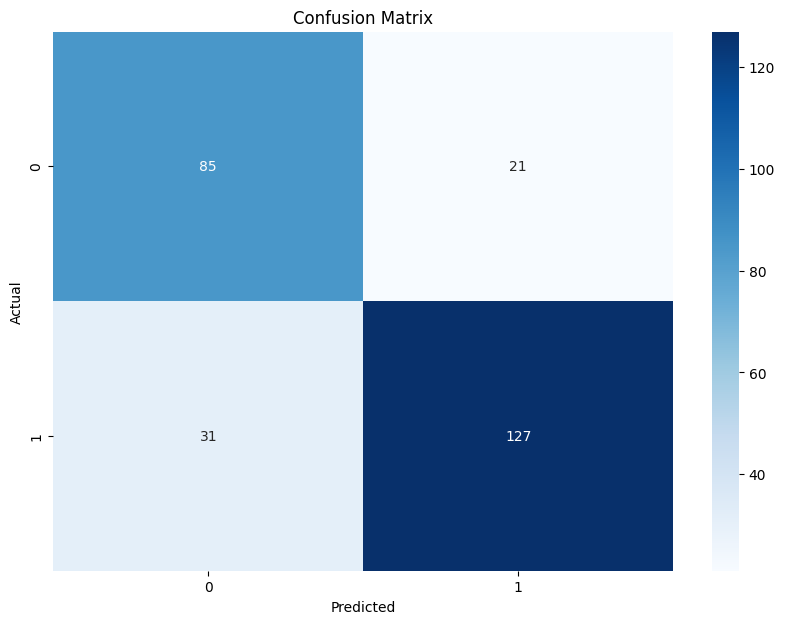

In [45]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77       106
           1       0.86      0.80      0.83       158

    accuracy                           0.80       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.81      0.80      0.80       264



## lets make a new model increasing the hidden neurons to 30 from 9

In [47]:
ann1=tf.keras.models.Sequential()

In [48]:
ann1.add(tf.keras.layers.Dense(units=30,activation='relu'))

In [49]:
ann1.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [50]:
ann1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [84]:
ann1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
history2=ann1.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
33/33 [==============================] - 4s 86ms/step - loss: 0.6664 - accuracy: 0.5763
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6199
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.6284
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.6616
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6777
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7033
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7090
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7223
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7261
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7261
Epoch 11

In [86]:
model2_eval=ann1.evaluate(X_test,y_test)

9/9 [==============================] - 1s 119ms/step - loss: 0.3612 - accuracy: 0.8182


In [98]:
model2_train=ann1.evaluate(X_train,y_train) #comparing with X_test to check for overfiiting

33/33 [==============================] - 1s 29ms/step - loss: 0.2824 - accuracy: 0.8758


In [102]:
model_result=[['model 1',model1_eval],     ##testing accuracy
              ['model 2',model2_eval]]

In [103]:
model_result

[['model 1', [0.3578972816467285, 0.8030303120613098]],
 ['model 2', [0.36122941970825195, 0.8181818127632141]]]

In [107]:
model_train=[['model 1',model1_train],       ##training accuracy
              ['model 2',model2_train]]

In [108]:
model_train

[['model 1', [0.16361568868160248, 0.9421800971031189]],
 ['model 2', [0.28240394592285156, 0.8758293986320496]]]

<Axes: >

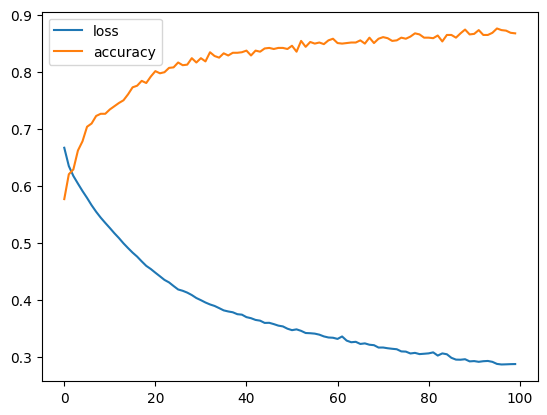

In [89]:
pd.DataFrame(history2.history).plot()


In [76]:
y_pred2=ann1.predict(X_test)

9/9 [==============================] - 1s 70ms/step


In [77]:
y_pred2=y_pred2 > 0.5

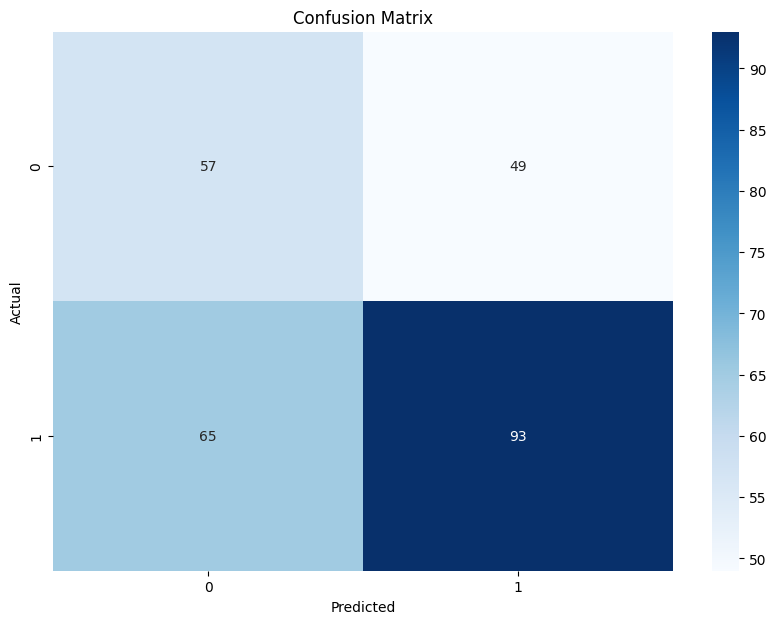

In [124]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
from sklearn.metrics import classification_report #Precision, recall, f1-score and support
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       106
           1       0.65      0.59      0.62       158

    accuracy                           0.57       264
   macro avg       0.56      0.56      0.56       264
weighted avg       0.58      0.57      0.57       264



## we will use the second model and increase the epochs

In [109]:
ann3=tf.keras.models.Sequential()

In [110]:
ann3.add(tf.keras.layers.Dense(units=30,activation='relu'))

In [111]:
ann3.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [112]:
ann3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [113]:
ann3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [114]:
history3=ann3.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
33/33 [==============================] - 1s 5ms/step - loss: 0.6848 - accuracy: 0.5924
Epoch 2/200
33/33 [==============================] - 1s 30ms/step - loss: 0.6430 - accuracy: 0.6066
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.6445
Epoch 4/200
33/33 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.6654
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.6872
Epoch 6/200
33/33 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7024
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7090
Epoch 8/200
33/33 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7232
Epoch 9/200
33/33 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7374
Epoch 10/200
33/33 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7450
Epoch 11

In [116]:
model3_eval=ann3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 37ms/step - loss: 0.3494 - accuracy: 0.8258


In [118]:
model3_train=ann3.evaluate(X_train,y_train)

33/33 [==============================] - 0s 4ms/step - loss: 0.2275 - accuracy: 0.8957


<Axes: >

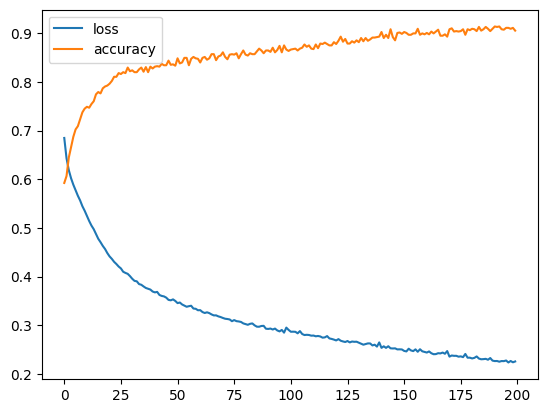

In [119]:
pd.DataFrame(history3.history).plot()

In [120]:
y_pred3=ann3.predict(X_test)


9/9 [==============================] - 1s 62ms/step


In [122]:
y_pred3=y_pred > 0.5

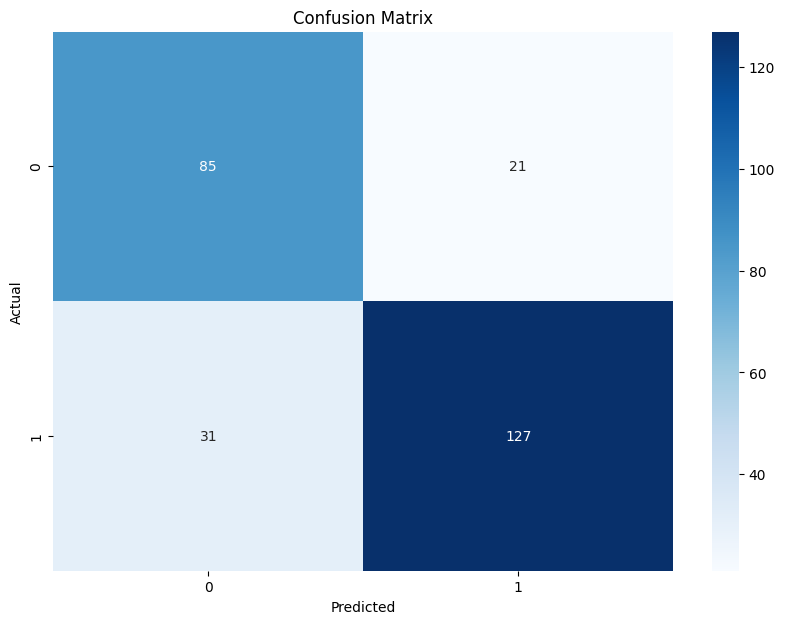

In [123]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [125]:
model_result=[['model 1',model1_eval],     ##testing accuracy
              ['model 2',model2_eval],
              ['model 3',model3_eval]]

In [126]:
model_result

[['model 1', [0.3578972816467285, 0.8030303120613098]],
 ['model 2', [0.36122941970825195, 0.8181818127632141]],
 ['model 3', [0.3494288921356201, 0.8257575631141663]]]

In [127]:
model_train=[['model 1',model1_train],       ##training accuracy
              ['model 2',model2_train],
             ['model 3',model3_train]]

In [128]:
model_train

[['model 1', [0.16361568868160248, 0.9421800971031189]],
 ['model 2', [0.28240394592285156, 0.8758293986320496]],
 ['model 3', [0.227522075176239, 0.8957346081733704]]]